## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 500

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load data

In [3]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Preliminary analyze

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
test.sample(5)

,id,keyword,location,text
14,45,NaN,NaN,Awesome!
1703,5755,forest%20fires,NaN,I hope the rain stops the forest fires tbh we'...
1184,3898,devastated,NaN,Obama Declares Disaster for Typhoon-Devastated...
691,2249,chemical%20emergency,NaN,Emergency services called to Bacup after 'stro...
1629,5483,flames,Little Rock,I only fuck you when it's half past five


In [10]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [11]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
print(f"Tweet without disaster info: {train.loc[train['target']==0,'text'][2:3].values}")
print(f"Tweet with disaster info: {train.loc[train['target']==1,'text'][2:3].values}")

Tweet without disaster info: ['Summer is lovely']
Tweet with disaster info: ["All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]


## Building transformer and pipline

In [13]:
snowball = SnowballStemmer(language='english')
english_stop_words = stopwords.words('english')

def tokenize_sentence(sentence: str, remove_stop_words: bool=True):
    tokens = word_tokenize(sentence, language='english')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in english_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [14]:
model_pipline = Pipeline([('vectorizer', 
            TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
                          ('model', LogisticRegression(C=10))])

# Preparing data for training

In [15]:
train_df = train.fillna(',')
test_df = test.fillna(',')

In [16]:
X = train_df['keyword'] + train_df['location'] + train_df['text']
X.shape

(7613,)

In [17]:
Y = train['target']
Y.shape

(7613,)

In [18]:
A = test_df['keyword'] + test_df['location'] + test_df['text']
A.shape

(3263,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6090,), (1523,), (6090,), (1523,))

# Fit data

In [20]:
_ = model_pipline.fit(X_train, y_train)

In [21]:
model_pipline.score(X_test, y_test)

0.7839789888378201

## Predict data

In [22]:
y_pred = model_pipline.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       885
           1       0.75      0.73      0.74       638

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.78      0.78      0.78      1523



In [24]:
probas_pred = model_pipline.predict_proba(X_test)
prec, rec, thresholds = precision_recall_curve(y_true=y_test, probas_pred=probas_pred[:,1])

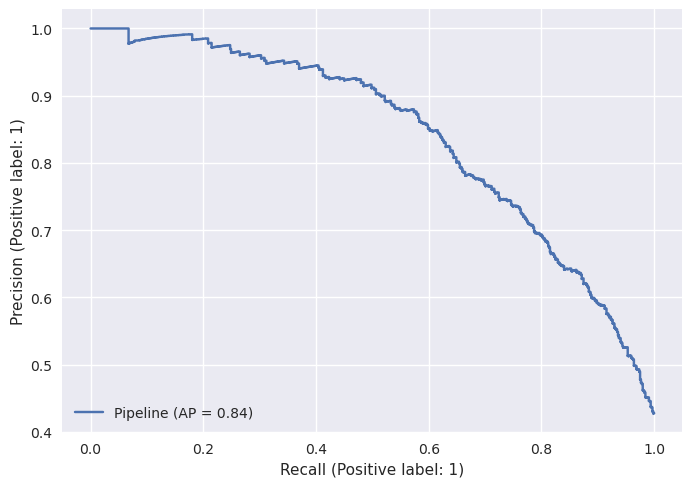

In [25]:
plot_precision_recall_curve(estimator=model_pipline, X=X_test, y=y_test);

In [26]:
np.where(prec>0.95)

(array([1226, 1227, 1228, 1229, 1230, 1231, 1241, 1242, 1243, 1244, 1245,
        1246, 1247, 1248, 1249, 1250, 1262, 1263, 1264, 1265, 1266, 1267,
        1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278,
        1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289,
        1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300,
        1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311,
        1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322,
        1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333,
        1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344,
        1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355,
        1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366,
        1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377,
        1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388,
        1389, 1390, 1391, 1392, 1393, 

In [27]:
precision_score(y_true=y_test, y_pred=probas_pred[:,1]>thresholds[1218])

0.9407114624505929

In [28]:
recall_score(y_true=y_test, y_pred=probas_pred[:,1]>thresholds[1218])

0.3730407523510972

## Send submission

In [29]:
predict = model_pipline.predict(A)
ids = test['id']
submission = pd.DataFrame(columns=['id','target'])
submission['id'] = ids
submission['target'] = predict
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [30]:
submission.to_csv('/kaggle/working/submission.csv', index=False)